In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the csv file
sl=pd.read_csv("advertising.csv")

In [3]:
sl

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [11]:
#As the first column is unnamed and is taking by the system as one of the column(consist of only counts) so we are dropping it.
sl.drop(columns=['Unnamed: 0'],inplace=True)

In [12]:
sl

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [13]:
#checking of datatypes
sl.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [14]:
sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
sl.shape

(200, 4)

In [16]:
#describing the dataset
sl.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
#checking of null values
sl.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [18]:
import seaborn as sns
import matplotlib as plt

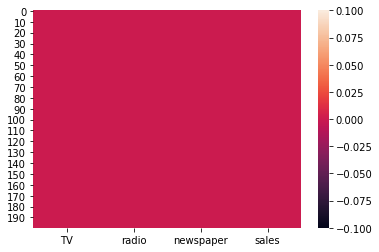

In [19]:
#checking of null values through heatmap
sns.heatmap(sl.isnull())

In [64]:
#checking the correlation 
sl.cor=sl.corr()
sl.cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


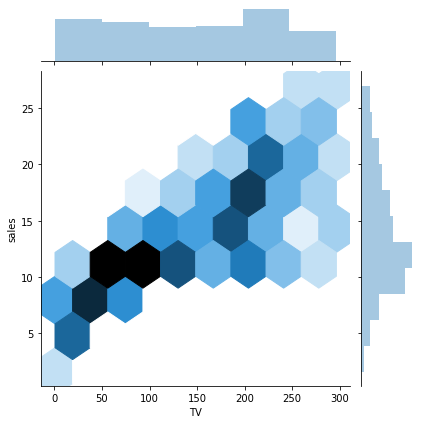

In [22]:
sns.jointplot(data=sl,x='TV',y='sales',kind='hex')
#from the below jointplot it can be seen that TV and Sales have strong relationships between them

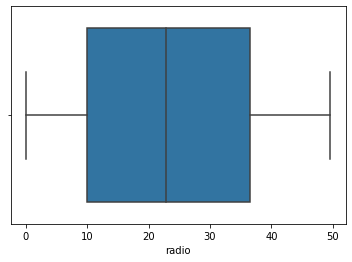

In [23]:
sns.boxplot(x=sl.radio)
#below boxplot shows the maximum no. of dollar are spent at which product

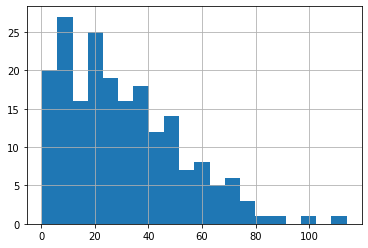

In [24]:
sl.newspaper.hist(bins=20)

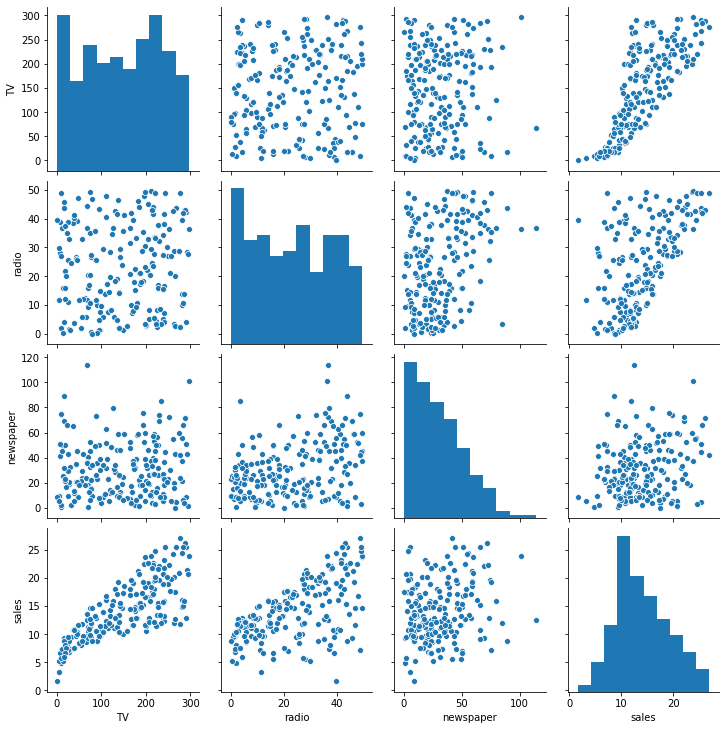

In [28]:
sns.pairplot(sl)

In [30]:
#removing of outliers
from scipy.stats import zscore
z_score=abs(zscore(sl))
print(sl.shape)
sl_final=sl.loc[(z_score<3).all(axis=1)]
print(sl_final.shape)

(200, 4)
(198, 4)


In [31]:
#checking of skewness
sl.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [32]:
#removing the skewness
for index in sl_final.skew().index:
    if sl_final.skew().loc[index]>0.5:
        sl_final[index]=np.sqrt(sl_final[index])

In [33]:
sl_final.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

In [37]:
#assigning x and y values for training and testing
x=sl_final.drop(columns=["sales"])
y=sl_final[["sales"]]

In [38]:
print(x)
print(y)

        TV  radio  newspaper
0    230.1   37.8   8.318654
1     44.5   39.3   6.715653
2     17.2   45.9   8.324662
3    151.5   41.3   7.648529
4    180.8   10.8   7.641989
..     ...    ...        ...
195   38.2    3.7   3.714835
196   94.2    4.9   2.846050
197  177.0    9.3   2.529822
198  283.6   42.0   8.136338
199  232.1    8.6   2.949576

[198 rows x 3 columns]
     sales
0     22.1
1     10.4
2      9.3
3     18.5
4     12.9
..     ...
195    7.6
196    9.7
197   12.8
198   25.5
199   13.4

[198 rows x 1 columns]


In [39]:
x.shape

(198, 3)

In [42]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
x=scx.fit_transform(x)
x

array([[ 9.78697339e-01,  9.89521352e-01,  1.63669060e+00],
       [-1.19901165e+00,  1.09070498e+00,  8.24807889e-01],
       [-1.51933199e+00,  1.53591293e+00,  1.63973373e+00],
       [ 5.64563564e-02,  1.22561648e+00,  1.29728802e+00],
       [ 4.00243389e-01, -8.31783915e-01,  1.29397566e+00],
       [-1.61906543e+00,  1.73828018e+00,  1.80970327e+00],
       [-1.04647815e+00,  6.52242599e-01, -1.21277595e-01],
       [-3.10797368e-01, -2.38173309e-01, -8.51517342e-01],
       [-1.62023876e+00, -1.41864895e+00, -2.07003868e+00],
       [ 6.23176960e-01, -1.38492107e+00, -2.44520695e-01],
       [-9.45571378e-01, -1.16906267e+00, -8.49785485e-02],
       [ 7.98003813e-01,  5.86319933e-02, -1.56356175e+00],
       [-1.44189191e+00,  8.07390825e-01,  1.53500409e+00],
       [-5.77144318e-01, -1.04764232e+00, -1.21749539e+00],
       [ 6.73630347e-01,  6.58988174e-01,  8.58578063e-01],
       [ 5.71550238e-01,  1.65733328e+00,  1.10721196e+00],
       [ 1.58061798e+00,  1.11094170e+00

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [44]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score for :",r_state," is", r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("maximum r2_score to :",final_r_state," is :",max_r_score)
    return final_r_state

In [45]:
lregr=LinearRegression()

In [46]:
r_state=maxr2_score(lregr,x,y)

r2_score for : 42  is 0.8676195050932685
r2_score for : 43  is 0.8718598615640082
r2_score for : 44  is 0.802913273452689
r2_score for : 45  is 0.9079313195282692
r2_score for : 46  is 0.8901433098995474
r2_score for : 47  is 0.8933128373205268
r2_score for : 48  is 0.8671267276212342
r2_score for : 49  is 0.8356887052483304
r2_score for : 50  is 0.8594837337473658
r2_score for : 51  is 0.9010880467985356
r2_score for : 52  is 0.89148846388298
r2_score for : 53  is 0.8535810037056347
r2_score for : 54  is 0.8551859322805222
r2_score for : 55  is 0.8923659195101822
r2_score for : 56  is 0.8667317841504739
r2_score for : 57  is 0.8750943103036617
r2_score for : 58  is 0.927227797105984
r2_score for : 59  is 0.9222966812787994
r2_score for : 60  is 0.8904969689328694
r2_score for : 61  is 0.8666331918329043
r2_score for : 62  is 0.8675661967481245
r2_score for : 63  is 0.8877220927483047
r2_score for : 64  is 0.9188446499794984
r2_score for : 65  is 0.8830451089047668
r2_score for : 66  i

In [47]:
#doing cross validation to check whether the model is suffering from overfitting or underfitting
from sklearn.model_selection import cross_val_score
cross_val_score(lregr,x,y,cv=5,scoring="r2").mean()
#not suffering from over fitting over under fitting

0.8857406146589945

In [48]:
#checking more models to see if any other model is scoring more than logisitic_Regression
#checking with decision_tree_classifier
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [49]:
r_state=maxr2_score(dt,x,y)

r2_score for : 42  is 0.9415629723047589
r2_score for : 43  is 0.9683271291882513
r2_score for : 44  is 0.924780299706338
r2_score for : 45  is 0.9458834117093793
r2_score for : 46  is 0.9652600921629739
r2_score for : 47  is 0.9036176712909337
r2_score for : 48  is 0.9503235339579202
r2_score for : 49  is 0.966385695061101
r2_score for : 50  is 0.9658882660206197
r2_score for : 51  is 0.9580371744373246
r2_score for : 52  is 0.9524106486735309
r2_score for : 53  is 0.9435984096550565
r2_score for : 54  is 0.970435000091921
r2_score for : 55  is 0.9515263116592838
r2_score for : 56  is 0.9675663670912154
r2_score for : 57  is 0.9299457967593273
r2_score for : 58  is 0.9687317076459825
r2_score for : 59  is 0.9631613306816237
r2_score for : 60  is 0.9696023170553304
r2_score for : 61  is 0.9365352684336756
r2_score for : 62  is 0.9171106387529335
r2_score for : 63  is 0.969054211770686
r2_score for : 64  is 0.9234329791853377
r2_score for : 65  is 0.9569105219589568
r2_score for : 66  i

In [50]:
#doing cross validation to check whether the model is suffering from overfitting or underfitting
from sklearn.model_selection import cross_val_score
cross_val_score(dt,x,y,cv=5,scoring="r2").mean()
#not suffering from over fitting over under fitting

0.9530103401491044

In [51]:
#Using KNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [52]:
neighbors={"n_neighbors":range(1,30)}
knn=KNeighborsRegressor()
grs=GridSearchCV(knn,neighbors,cv=10)
grs.fit(x,y)
grs.best_params_

{'n_neighbors': 5}

In [53]:
knn=KNeighborsRegressor(n_neighbors=5)
r_state=maxr2_score(knn,x,y)

r2_score for : 42  is 0.9237051029830663
r2_score for : 43  is 0.9125199224678294
r2_score for : 44  is 0.922654602190904
r2_score for : 45  is 0.9319651155778834
r2_score for : 46  is 0.9079201333556782
r2_score for : 47  is 0.9381750643000956
r2_score for : 48  is 0.9204446674686808
r2_score for : 49  is 0.9039804028745108
r2_score for : 50  is 0.9366616523231509
r2_score for : 51  is 0.9246569541396491
r2_score for : 52  is 0.9642111416545275
r2_score for : 53  is 0.8751011879476535
r2_score for : 54  is 0.9178036112597671
r2_score for : 55  is 0.9424453458385987
r2_score for : 56  is 0.8710658622790626
r2_score for : 57  is 0.9031674635052745
r2_score for : 58  is 0.9531786989619312
r2_score for : 59  is 0.9292977462992443
r2_score for : 60  is 0.9120600093729121
r2_score for : 61  is 0.9026343486167605
r2_score for : 62  is 0.9313145424388493
r2_score for : 63  is 0.9636022352197599
r2_score for : 64  is 0.8954378506087086
r2_score for : 65  is 0.9447921933338983
r2_score for : 66

In [54]:
#doing cross validation to check whether the model is suffering from overfitting or underfitting
print("Mean r2 score for KNN Regression: ",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print(cross_val_score(knn,x,y,cv=5,scoring="r2"))
#not suffering from overfitting or underfitting

Mean r2 score for KNN Regression:  0.9358043941034188
standard deviation in r2 score for KNN Regression:  0.03206995726981771
[0.94412733 0.95671675 0.95845528 0.87260099 0.94712163]


In [55]:
#Using SVM model
from sklearn.svm import SVR
svm=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
grs = GridSearchCV(svm, parameters, cv=10)
grs.fit(x,y)
grs.best_params_

{'C': 10, 'kernel': 'rbf'}

In [56]:
svm=SVR(kernel="rbf",C=10)
r_state=maxr2_score(svm,x,y)
#by SVM we are getting the 99% score which means this model has learnt better than the other models

r2_score for : 42  is 0.9703335533974511
r2_score for : 43  is 0.9580984571894273
r2_score for : 44  is 0.9752414973911225
r2_score for : 45  is 0.9903084363001728
r2_score for : 46  is 0.9605934569844062
r2_score for : 47  is 0.9813636646000993
r2_score for : 48  is 0.950294724732767
r2_score for : 49  is 0.9498964525171399
r2_score for : 50  is 0.9829712541970975
r2_score for : 51  is 0.9730955123623939
r2_score for : 52  is 0.970844982298738
r2_score for : 53  is 0.9357263125598732
r2_score for : 54  is 0.9824218946198017
r2_score for : 55  is 0.9839666442738735
r2_score for : 56  is 0.9412027517081915
r2_score for : 57  is 0.9444941540273522
r2_score for : 58  is 0.9819780265275884
r2_score for : 59  is 0.9869202920943145
r2_score for : 60  is 0.9651630813017087
r2_score for : 61  is 0.9578583750533364
r2_score for : 62  is 0.9757400187690108
r2_score for : 63  is 0.9921137932959339
r2_score for : 64  is 0.9694847523866529
r2_score for : 65  is 0.9798579845825757
r2_score for : 66 

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm,x,y,cv=5,scoring="r2").mean()
#not suffering from over fitting over under fitting

0.9754906234980829

In [58]:
#As SVM is showing the best results so we will save it for the production
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,test_size=0.22)
svm=SVR(kernel="rbf",C=10)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error
print("r2 score is:" ,r2_score(y_test,y_pred))
print("RMSE is:" ,np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.9921137932959339
RMSE is: 0.44146827492163243


In [63]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(svm,'Sales_Channel_svm.pk1')

['Sales_Channel_svm.pk1']